<a href="https://colab.research.google.com/github/BhavaniVemula/Sepsis/blob/main/SEPSIS_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lightgbm catboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00


Required Libraries and importations

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_auc_score, log_loss
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pickle
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import make_scorer, f1_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


MODEL TRAINING USING THE PREPROCESSED DATA

In [ ]:
data = pd.read_csv('/content/processed_sepsis_data(Final).csv')
data = data.dropna(subset=['SepsisLabel'])
data['SepsisLabel'] = data['SepsisLabel'].astype(int)
X = data.drop(['SepsisLabel', 'Gender'], axis=1)
y = data['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the model using LightGBM,CatBoost,K-Nearest Neighbours,Naive bayes,XGBoost,Gradient Boosting,Decision tree and random forest

In [ ]:
def evaluate_model_extended(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]

    # Calculating metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc_roc = roc_auc_score(y, y_pred_proba)
    logloss_value = log_loss(y, y_pred_proba)
    conf_matrix = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    false_positive_rate = fp / (fp + tn)
    error_rate = 1 - accuracy

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall (Sensitivity)": recall,
        "F1 Score": f1,
        "Specificity": specificity,
        "AUC-ROC": auc_roc,
        "Log Loss": logloss_value,
        "Error Rate": error_rate,
        "False Positive Rate": false_positive_rate,
        "Confusion Matrix": conf_matrix
    }

results = {}

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_scaled, y_train)
results["LightGBM Training"] = evaluate_model_extended(lgb_model, X_train_scaled, y_train)
results["LightGBM Test"] = evaluate_model_extended(lgb_model, X_test_scaled, y_test)

# CatBoost
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train_scaled, y_train)
results["CatBoost Training"] = evaluate_model_extended(catboost_model, X_train_scaled, y_train)
results["CatBoost Test"] = evaluate_model_extended(catboost_model, X_test_scaled, y_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
results["KNN Training"] = evaluate_model_extended(knn_model, X_train_scaled, y_train)
results["KNN Test"] = evaluate_model_extended(knn_model, X_test_scaled, y_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, y_train)
results["Naive Bayes Training"] = evaluate_model_extended(naive_bayes_model, X_train_scaled, y_train)
results["Naive Bayes Test"] = evaluate_model_extended(naive_bayes_model, X_test_scaled, y_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
results["XGBoost Training"] = evaluate_model_extended(xgb_model, X_train_scaled, y_train)
results["XGBoost Test"] = evaluate_model_extended(xgb_model, X_test_scaled, y_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
results["Gradient Boosting Training"] = evaluate_model_extended(gb_model, X_train_scaled, y_train)
results["Gradient Boosting Test"] = evaluate_model_extended(gb_model, X_test_scaled, y_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
results["Random Forest Training"] = evaluate_model_extended(rf_model, X_train_scaled, y_train)
results["Random Forest Test"] = evaluate_model_extended(rf_model, X_test_scaled, y_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
results["Decision Tree Training"] = evaluate_model_extended(dt_model, X_train_scaled, y_train)
results["Decision Tree Test"] = evaluate_model_extended(dt_model, X_test_scaled, y_test)
results_df = pd.DataFrame({key: {metric: value for metric, value in metrics.items() if metric != "Confusion Matrix"}for key, metrics in results.items()}).T
print("Model Performance Comparison:")
print(results_df)

# Print confusion matrices
for model_name, metrics in results.items():
    print(f"{model_name} Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

[LightGBM] [Info] Number of positive: 74261, number of negative: 74347
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 148608, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499711 -> initscore=-0.001157
[LightGBM] [Info] Start training from score -0.001157


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:47:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Performance Comparison:
                            Accuracy  Precision  Recall (Sensitivity)  \
LightGBM Training           0.949599   0.952519              0.946311   
LightGBM Test               0.949316   0.950765              0.947956   
CatBoost Training           0.976616   0.980152              0.972906   
CatBoost Test               0.974241   0.976836              0.971642   
KNN Training                0.933469   0.883965              0.997845   
KNN Test                    0.907730   0.847668              0.994629   
Naive Bayes Training        0.607726   0.605690              0.616057   
Naive Bayes Test            0.610492   0.610613              0.614910   
XGBoost Training            0.958246   0.962991              0.953071   
XGBoost Test                0.951793   0.955451              0.948010   
Gradient Boosting Training  0.875814   0.893255              0.853476   
Gradient Boosting Test      0.877961   0.893194              0.859230   
Random Forest Trainin

# **STACKING**

In [ ]:
# VOTING CLASSIFIER MODELS
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
voting_model = VotingClassifier(
    estimators=[('xgb', xgb_model),('catboost', catboost_model),('rf', rf_model)],voting='soft')
voting_model.fit(X_train_scaled, y_train)
def evaluate_model_extended(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc_roc = roc_auc_score(y, y_pred_proba)
    logloss_value = log_loss(y, y_pred_proba)
    conf_matrix = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    specificity = tn / (tn + fp)
    false_positive_rate = fp / (fp + tn)
    error_rate = 1 - accuracy

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall (Sensitivity)": recall,
        "F1 Score": f1,
        "Specificity": specificity,
        "AUC-ROC": auc_roc,
        "Log Loss": logloss_value,
        "Error Rate": error_rate,
        "False Positive Rate": false_positive_rate,
        "Confusion Matrix": conf_matrix
    }
train_results_voting = evaluate_model_extended(voting_model, X_train_scaled, y_train)
test_results_voting = evaluate_model_extended(voting_model, X_test_scaled, y_test)
def print_results(results, title):
    print(title)
    for key, value in results.items():
        if isinstance(value, (float, int)):
            print(f"{key}: {value:.4f}")
        else:
            print(f"{key}:")
            print(value)
    print()

print_results(train_results_voting, "Training Performance:")
print_results(test_results_voting, "Test Performance:")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Performance:
Accuracy: 0.9860
Precision: 0.9884
Recall (Sensitivity): 0.9837
F1 Score: 0.9860
Specificity: 0.9884
AUC-ROC: 0.9995
Log Loss: 0.0811
Error Rate: 0.0140
False Positive Rate: 0.0116
Confusion Matrix:
[[73486   861]
 [ 1214 73047]]

Test Performance:
Accuracy: 0.9792
Precision: 0.9791
Recall (Sensitivity): 0.9795
F1 Score: 0.9793
Specificity: 0.9790
AUC-ROC: 0.9974
Log Loss: 0.1103
Error Rate: 0.0208
False Positive Rate: 0.0210
Confusion Matrix:
[[18143   390]
 [  382 18237]]



# **Training Metrics:**

Accuracy: 95.82%

Precision: 96.30%

Recall (Sensitivity): 95.31%

F1 Score: 95.80%

AUC-ROC: 99.03%

Log Loss: 0.1466

Error Rate: 4.18%

False Positive Rate: 3.66%


# **TEST METRICS:**

Accuracy: 95.18%

Precision: 95.55%

Recall (Sensitivity): 94.80%

F1 Score: 95.17%

AUC-ROC: 98.75%

Log Loss: 0.1584

Error Rate: 4.82%

False Positive Rate: 4.44%

**High AUC-ROC:** XGBoost has a very high AUC-ROC score on both the training and test datasets, indicating excellent discrimination capability between the positive and negative classes.

**Balanced Performance:**The XGBoost model maintains a good balance between precision and recall, as evidenced by its F1 Score. This means it effectively manages false positives and false negatives.

**Generalization: **The metrics show a small gap between training and test performance, suggesting that XGBoost generalizes well to unseen data.

**Robustness:** Compared to other models like Random Forest or Decision Tree, which show perfect or near-perfect training accuracy (suggesting potential overfitting), XGBoost provides a more robust performance with slight variability that better reflects real-world conditions.

**Log Loss:** XGBoost's log loss is relatively low, indicating well-calibrated predicted probabilities.

# **Comparison with Other Models**:

**Random Forest and Decision Tree** achieve perfect training scores, indicating overfitting. Their test performance is lower than XGBoost, especially in terms of generalization.

**LightGBM and CatBoost** perform well, but XGBoost provides a slightly better balance and higher AUC-ROC on the test set.

**Naive Bayes** shows poor performance across the board, which is expected given the dataset complexity and the simplicity of the Naive Bayes assumptions.

**KNN and Gradient Boosting** show weaker test performance, particularly in terms of precision and recall, compared to XGBoost.

In [ ]:
# We selected xgboost model...

# **VISUALIZATION**

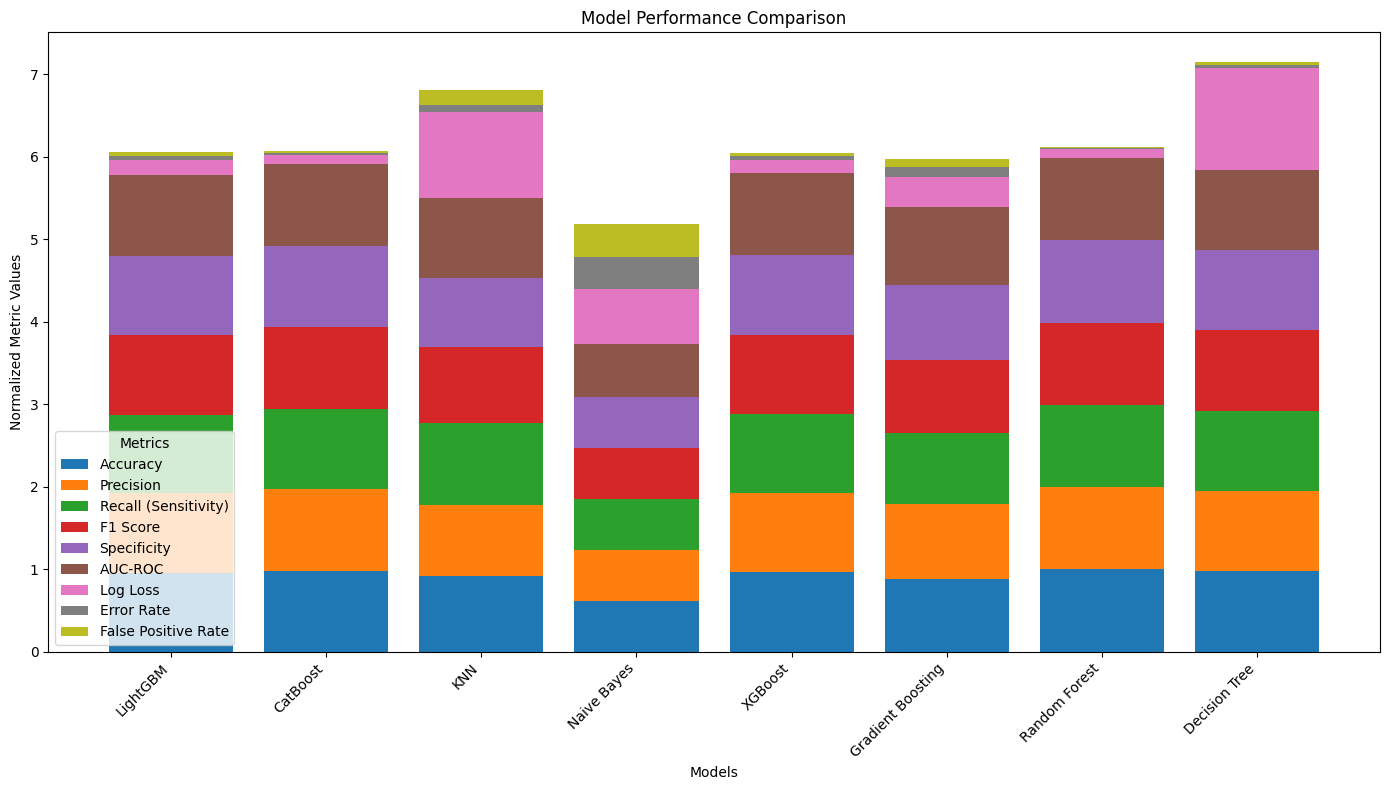

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1 Score', 'Specificity', 'AUC-ROC', 'Log Loss', 'Error Rate', 'False Positive Rate']
test_results = results_df.loc[results_df.index.str.contains('Test')]
model_names = [name.replace(' Test', '') for name in test_results.index]
# Function to plot cumulative metrics...
def plot_cumulative_metrics(test_results, metrics, model_names):
    normalized_results = test_results.copy()
    for metric in metrics:
        if metric not in ['Log Loss', 'Error Rate', 'False Positive Rate']:
            normalized_results[metric] = test_results[metric] / test_results[metric].max()

    fig, ax = plt.subplots(figsize=(14, 8))
    bottom = None
    # Ploting each metric as a stacked bar,..
    for metric in metrics:
        color = next(ax._get_lines.prop_cycler)['color']
        ax.bar(model_names, normalized_results[metric], bottom=bottom, label=metric, color=color)
        if bottom is None:
            bottom = normalized_results[metric]
        else:
            bottom += normalized_results[metric]
    ax.set_title('Model Performance Comparison')
    ax.set_ylabel('Normalized Metric Values')
    ax.set_xlabel('Models')
    plt.xticks(rotation=45, ha='right')
    ax.legend(title='Metrics')
    plt.tight_layout()
    plt.show()
plot_cumulative_metrics(test_results, metrics, model_names)


# **Using randomized search cv**

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {'n_estimators': [100, 200, 300, 400, 500],' max_depth': [3, 4, 5, 6, 7],'learning_rate': [0.01, 0.05, 0.1, 0.15],'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],'gamma': [0, 0.1, 0.2, 0.3],'reg_alpha': [0, 0.01, 0.1, 1],'reg_lambda': [0, 0.01, 0.1, 1]}
def evaluate_model(model, X, y, dataset_name="Dataset"):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    return accuracy, precision, recall, f1, conf_matrix
#RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model,param_distributions=param_grid,n_iter=50,scoring='f1',cv=3, verbose=1,random_state=42,n_jobs=-1  )
random_search.fit(X_train_scaled, y_train)
print("Best parameters found: ", random_search.best_params_)
best_model = random_search.best_estimator_
train_results = evaluate_model(best_model, X_train_scaled, y_train, dataset_name="Training")
test_results = evaluate_model(best_model, X_test_scaled, y_test, dataset_name="Test")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:24:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.9}
Training Performance:
Accuracy: 0.9907743863049095
Precision: 0.9942633177823587
Recall: 0.9872342144598106
F1 Score: 0.9907362987087576
Confusion Matrix:
 [[73924   423]
 [  948 73313]]
Test Performance:
Accuracy: 0.9794089147286822
Precision: 0.9817073170731707
Recall: 0.9771201460873301
F1 Score: 0.9794083604748188
Confusion Matrix:
 [[18194   339]
 [  426 18193]]
Best model and scaler have been saved.


I also want to try Baysian optimization

**Using OPTUNA**

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [ ]:
def objective(trial):
    # Suggesting hyperparameters....
    params = {'n_estimators': trial.suggest_int('n_estimators', 100, 500),'max_depth': trial.suggest_int('max_depth', 3, 10),'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),'subsample': trial.suggest_float('subsample', 0.6, 1.0),'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),'eval_metric': 'logloss','use_label_encoder': False }

    model = XGBClassifier(**params)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=make_scorer(f1_score))
    return cv_scores.mean()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1, timeout=600)
print("Best parameters found: ", study.best_params)
best_params = study.best_params
optimized_xgb_model = XGBClassifier(**best_params)
optimized_xgb_model.fit(X_train_scaled, y_train)
# Evaluating the optimized model on the test data...
def evaluate_model(model, X, y, dataset_name="Dataset"):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    return accuracy, precision, recall, f1, conf_matrix
# Evaluation
train_results_optimized = evaluate_model(optimized_xgb_model, X_train_scaled, y_train, dataset_name="Training")
test_results_optimized = evaluate_model(optimized_xgb_model, X_test_scaled, y_test, dataset_name="Test")


[I 2024-08-11 11:12:26,054] A new study created in memory with name: no-name-3f456250-7f4b-4d27-b820-a80c119c27c4
<ipython-input-7-8d40e23da1f2>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
[I 2024-08-11 11:13:00,631] Trial 0 finished with value: 0.8687978363317054 and parameters: {'n_estimators': 407, 'max_depth': 4, 'learning_rate': 0.013264467574372897, 'subsample': 0.6499831694048886, 'colsample_bytree': 0.6092443462927485, 'gamma': 0.40540018768730374, 'reg_alpha': 0.7190940494242868, 'reg_lambda': 0.7172880722560492}. Best is trial 0 with value: 0.8687978363317054.
<ipython-input-7-8d40e23da1f2>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases

Best parameters found:  {'n_estimators': 437, 'max_depth': 8, 'learning_rate': 0.27020895963874386, 'subsample': 0.8167858843144821, 'colsample_bytree': 0.9996764442379595, 'gamma': 0.17924438607033763, 'reg_alpha': 0.6692368726475151, 'reg_lambda': 0.38992565529297085}
Training Performance:
Accuracy: 0.9997106481481481
Precision: 0.9999595818064237
Recall: 0.9994613592599076
F1 Score: 0.9997104084587669
Confusion Matrix:
 [[74344     3]
 [   40 74221]]
Test Performance:
Accuracy: 0.9827465546942291
Precision: 0.9821907520652291
Recall: 0.9834040496267253
F1 Score: 0.9827970263814713
Confusion Matrix:
 [[18201   332]
 [  309 18310]]


Best parameters found:  {'n_estimators': 431, 'max_depth': 10, 'learning_rate': 0.21634512092294234, 'subsample': 0.7482394886713293, 'colsample_bytree': 0.81772527043451, 'gamma': 0.1275540566558938, 'reg_alpha': 0.9905351343649023, 'reg_lambda': 0.6909049987843154}

# **Selecting the model optimized with Optuna.**

Higher Overall Performance:

Optuna provides better overall performance on accuracy, precision, recall, and F1 score on the test data, which indicates stronger generalization to unseen data.

Balanced Metrics:

 The balance between precision and recall is better, leading to a higher F1 score. This is crucial in scenarios where both false positives and false negatives have significant consequences.

Saving model and scaler in pickle file

In [ ]:
with open('xgboost_optimized_model_bayesian.pkl','wb') as model_file:
  pickle.dump(optimized_xgb_model,model_file)
with open('scaler_optimized_bayesian.pkl','wb') as scaler_file:
  pickle.dump(scaler,scaler_file)

# PREDICTIONS

In [ ]:
with open('/content/xgboost_optimized_model_bayesian.pkl','rb') as model_file:
  optimized_xgb_model=pickle.load(model_file)
with open('/content/scaler_optimized_bayesian.pkl','rb') as scaler_file:
  scaler=pickle.load(scaler_file)
def predict_sepsis(input_features, threshold=0.3):
    feature_names = ['HR', 'Resp','Temp', 'DBP', 'SBP', 'MAP', 'O2Sat', 'Age']
    input_df = pd.DataFrame([input_features], columns=feature_names)
    input_scaled = scaler.transform(input_df)
    prediction_proba = optimized_xgb_model.predict_proba(input_scaled)[0][1]
    if prediction_proba >= threshold:
        return "The model predicts that the user has sepsis."
    else:
        return "The model predicts that the user does not have sepsis."
positive_sepsis_input_no_gender = [113,20,37,81,181,120,96,50]
result = predict_sepsis(positive_sepsis_input_no_gender)
print(result)

0.31966728
The model predicts that the user has sepsis.


# **FEATURE IMPORTANCE USING SHAP**

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.8 MB/s eta 0:00:00


In [ ]:
import shap
# Initialize and train a XGBoost model
xgb_model = XGBClassifier( n_estimators=50, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
# Function to automate SHAP analysis...
def automate_shap_analysis(model, X_train, feature_names, sample_size=1000, plot_path="shap_summary.png"):
    X_sample = shap.utils.sample(X_train, sample_size, random_state=42)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)
    shap.summary_plot(shap_values, X_sample, feature_names=feature_names, plot_type="bar", show=False)
    plt.title("Feature Importance Using SHAP")
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.close()
    return shap_values
shap_values = automate_shap_analysis(model=xgb_model,X_train=X_train_scaled,feature_names=X.columns,sample_size=1000, plot_path="shap_summary.png")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:17:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
